In [ ]:
# Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Machine Learning tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)


In [ ]:
from google.colab import files
uploaded = files.upload()

# Baca file Excel setelah di-upload
import io
df = pd.read_excel(io.BytesIO(uploaded['Data hasil Bat-s sederhana.xlsx']))

# Tampilkan 5 data teratas
df.head()


Saving Data hasil Bat-s sederhana.xlsx to Data hasil Bat-s sederhana.xlsx


,Nama,Jenis Kelamin,Umur,Semester berapa Anda saat ini?,SMT,IPK,Program Studi,Exhaustion,Mental Distance,Cognitive Impairment,Emotional Impairment,Psychological Distress,Psychosomatic Complaints
0,KA,Laki-laki,22,Semester 6,6,3.3,S1-Pendidikan Masyarakat,3.555556,3.50,3.6,3.8,3.6,3.50
1,PW,Perempuan,20,Semester 4,4,3.4,S1-Manajemen Pendidikan,3.666667,3.50,3.4,3.4,4.4,3.50
2,ANS,Perempuan,18,Semester 2,2,3.1,S1-Manajemen Pendidikan,3.555556,3.50,3.8,3.6,4.2,3.50
3,RF,Laki-laki,20,Semester 4,4,3.51,S1-Pendidikan Masyarakat,3.111111,3.75,3.4,3.6,4.4,4.75
4,JK,Laki-laki,21,Semester 4,4,3.27,S1-Teknologi Pendidikan,3.222222,3.25,3.8,3.6,4.4,4.25


In [ ]:
df.dtypes


,0
Nama,object
Jenis Kelamin,object
Umur,int64
Semester berapa Anda saat ini?,object
SMT,int64
IPK,object
Program Studi,object
Exhaustion,float64
Mental Distance,float64
Cognitive Impairment,float64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Nama                            160 non-null    object 
 1   Jenis Kelamin                   161 non-null    object 
 2   Umur                            161 non-null    int64  
 3   Semester berapa Anda saat ini?  161 non-null    object 
 4   SMT                             161 non-null    int64  
 5   IPK                             161 non-null    object 
 6   Program Studi                   161 non-null    object 
 7   Exhaustion                      161 non-null    float64
 8   Mental Distance                 161 non-null    float64
 9   Cognitive Impairment            161 non-null    float64
 10  Emotional Impairment            161 non-null    float64
 11  Psychological Distress          161 non-null    float64
 12  Psychosomatic Complaints        161 

In [ ]:
# Hitung skor burnout sebagai rata-rata dari 4 subskala utama
df['burnout_score'] = df[['Exhaustion', 'Mental Distance', 'Cognitive Impairment', 'Emotional Impairment']].mean(axis=1)

# Tampilkan data awal untuk verifikasi
df[['Exhaustion', 'Mental Distance', 'Cognitive Impairment', 'Emotional Impairment', 'burnout_score']].head()


,Exhaustion,Mental Distance,Cognitive Impairment,Emotional Impairment,burnout_score
0,3.555556,3.50,3.6,3.8,3.613889
1,3.666667,3.50,3.4,3.4,3.491667
2,3.555556,3.50,3.8,3.6,3.613889
3,3.111111,3.75,3.4,3.6,3.465278
4,3.222222,3.25,3.8,3.6,3.468056


In [ ]:
# Fungsi klasifikasi burnout
def klasifikasi_burnout(score):
    if score < 2.58:
        return 'Green'  # Tidak Burnout
    elif 2.58 <= score < 3.02:
        return 'Orange'  # Risiko Burnout
    else:
        return 'Red'  # Burnout Tinggi

# Terapkan klasifikasi
df['burnout_label'] = df['burnout_score'].apply(klasifikasi_burnout)

# Cek hasil
df[['burnout_score', 'burnout_label']].head()


,burnout_score,burnout_label
0,3.613889,Red
1,3.491667,Red
2,3.613889,Red
3,3.465278,Red
4,3.468056,Red


In [ ]:
# Salin data untuk preprocessing
X = df.drop(columns=['Nama', 'burnout_label', 'burnout_score'])  # Sesuaikan jika ada kolom target & identitas
y = df['burnout_label']  # Target klasifikasi

# Ubah kolom kategorikal menjadi numerik
X_encoded = pd.get_dummies(X, drop_first=True)  # one-hot encoding

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Standarisasi fitur numerik
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Melatih model Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_svm = svm_model.predict(X_test_scaled)

In [ ]:
# Mengevaluasi kinerja model
svm_report = classification_report(y_test, y_pred_svm)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_confusion = confusion_matrix(y_test, y_pred_svm)

In [ ]:
print("SVM report: ", svm_report)

SVM report:                precision    recall  f1-score   support

       Green       1.00      1.00      1.00         4
      Orange       0.50      1.00      0.67         1
         Red       1.00      0.96      0.98        28

    accuracy                           0.97        33
   macro avg       0.83      0.99      0.88        33
weighted avg       0.98      0.97      0.97        33



In [ ]:
print("SVM accuracy: ", svm_accuracy)

SVM accuracy:  0.9696969696969697


In [ ]:
print("SVM Confusion: ", svm_confusion)

SVM Confusion:  [[ 4  0  0]
 [ 0  1  0]
 [ 0  1 27]]


In [ ]:
# Melatih model Random Forest (RF)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Mengevaluasi kinerja model
rf_report = classification_report(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_confusion = confusion_matrix(y_test, y_pred_rf)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
print("RF report: ", rf_report)

RF report:                precision    recall  f1-score   support

       Green       0.80      1.00      0.89         4
      Orange       0.00      0.00      0.00         1
         Red       1.00      1.00      1.00        28

    accuracy                           0.97        33
   macro avg       0.60      0.67      0.63        33
weighted avg       0.95      0.97      0.96        33



In [ ]:
print("RF accuracy: ", rf_accuracy)

RF accuracy:  0.9696969696969697


In [ ]:
print("RF confusion: ", rf_confusion)

RF confusion:  [[ 4  0  0]
 [ 1  0  0]
 [ 0  0 28]]


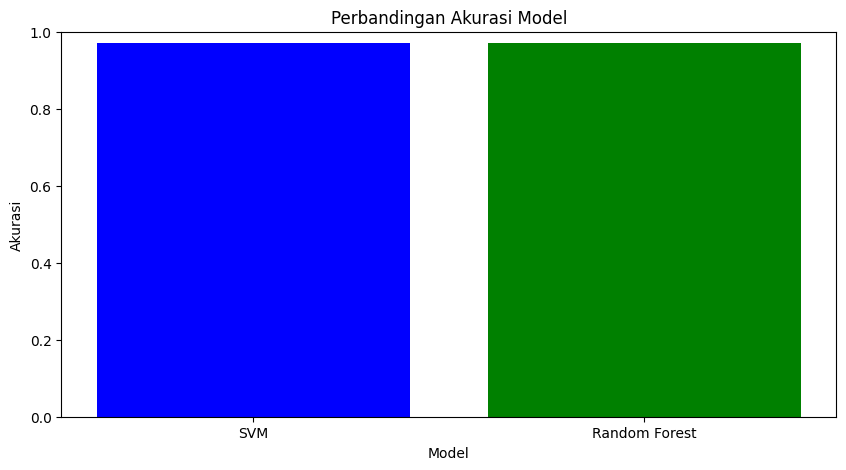

In [ ]:
# Menyiapkan data untuk visualisasi
models = ['SVM', 'Random Forest']
accuracies = [svm_accuracy, rf_accuracy]

# Membuat plot perbandingan akurasi
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi Model')
plt.ylim(0, 1)
plt.show()

Grafik di atas menampilkan perbandingan akurasi antara dua algoritma klasifikasi yang digunakan, yaitu:

Support Vector Machine (SVM)

Random Forest (RF)

Akurasi adalah salah satu metrik evaluasi yang menunjukkan persentase prediksi yang benar dari seluruh data yang diuji. Nilainya berkisar antara 0 hingga 1, di mana nilai yang lebih tinggi menunjukkan performa model yang lebih baik.

Dengan melihat grafik ini, kita dapat dengan mudah menentukan model mana yang memberikan prediksi paling akurat untuk klasifikasi tingkat burnout mahasiswa.

Perbandingan ini juga memberikan gambaran awal tentang efektivitas model sebelum melihat metrik lain seperti precision, recall, dan F1-score.

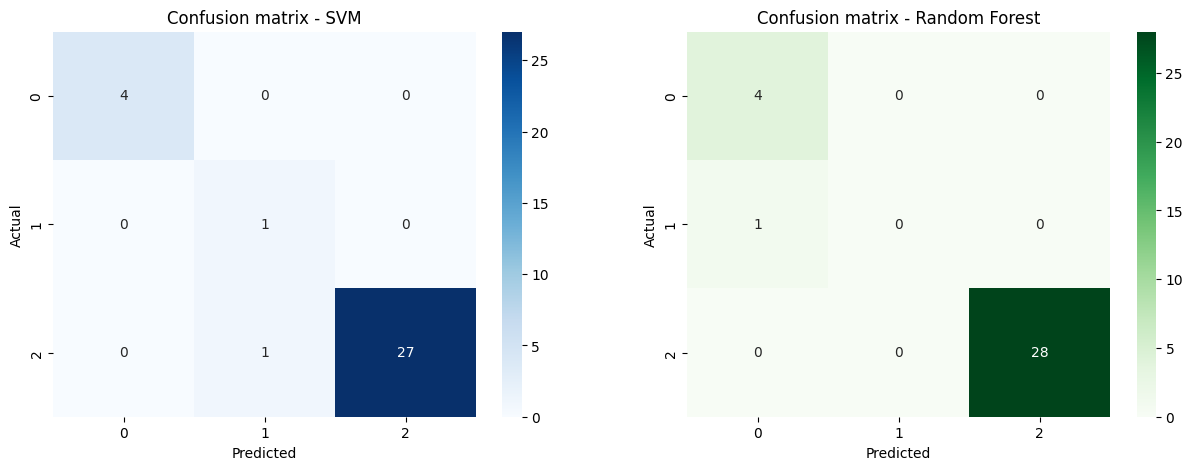

In [ ]:
# Membuat plot confusion matrix untuk SVM dan RF
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Confusion matrix untuk SVM
svm_conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(svm_conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion matrix - SVM')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Confusion matrix untuk RF
rf_conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title('Confusion matrix - Random Forest')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.show()

Visualisasi di atas menunjukkan confusion matrix dari dua model klasifikasi: Support Vector Machine (SVM) dan Random Forest (RF) yang digunakan untuk memprediksi tingkat burnout mahasiswa berdasarkan data psikologis mereka.

<Figure size 1000x500 with 0 Axes>

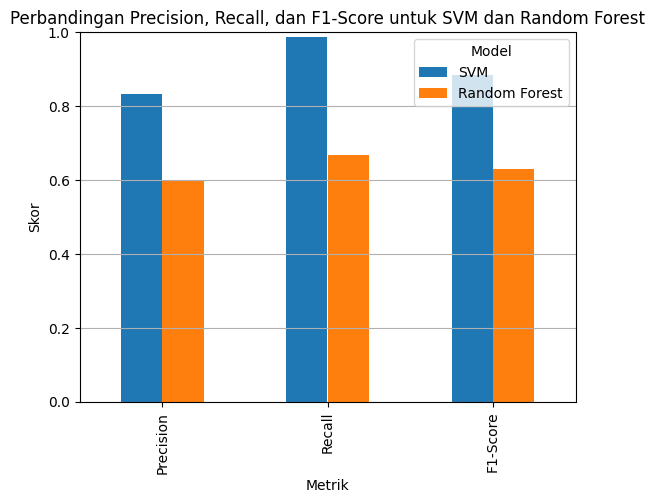

In [ ]:
def extract_metrics(report):
    import re
    pattern = r'\d+\.\d+'
    lines = report.split('\n')
    metrics = {'precision': [], 'recall': [], 'f1-score': []}

    for line in lines:
        parts = line.strip().split()
        if len(parts) == 5 and parts[0] not in ['accuracy', 'macro', 'weighted', 'avg']:
            try:
                metrics['precision'].append(float(parts[1]))
                metrics['recall'].append(float(parts[2]))
                metrics['f1-score'].append(float(parts[3]))
            except:
                continue

    # Hindari pembagian 0
    avg_metrics = {k: (sum(v) / len(v)) if len(v) > 0 else 0 for k, v in metrics.items()}
    return avg_metrics

# Asumsikan svm_report dan rf_report sudah didefinisikan
svm_metrics = extract_metrics(svm_report)
rf_metrics = extract_metrics(rf_report)

# Membuat dataframe untuk plotting
data = {
    'Metric': ['Precision', 'Recall', 'F1-Score'],
    'SVM': [svm_metrics['precision'], svm_metrics['recall'], svm_metrics['f1-score']],
    'Random Forest': [rf_metrics['precision'], rf_metrics['recall'], rf_metrics['f1-score']]
}
df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 5))
df.plot(x='Metric', y=['SVM', 'Random Forest'], kind='bar')
plt.title('Perbandingan Precision, Recall, dan F1-Score untuk SVM dan Random Forest')
plt.xlabel('Metrik')
plt.ylabel('Skor')
plt.ylim(0, 1)
plt.legend(title='Model')
plt.grid(axis='y')
plt.show()

Grafik di atas menunjukkan perbandingan performa model Support Vector Machine (SVM) dan Random Forest berdasarkan tiga metrik utama: Precision, Recall, dan F1-Score. Metrik tersebut dihitung sebagai rata-rata dari masing-masing kelas dalam model klasifikasi burnout. Visualisasi ini membantu memahami model mana yang lebih andal dalam mengidentifikasi tingkat burnout responden

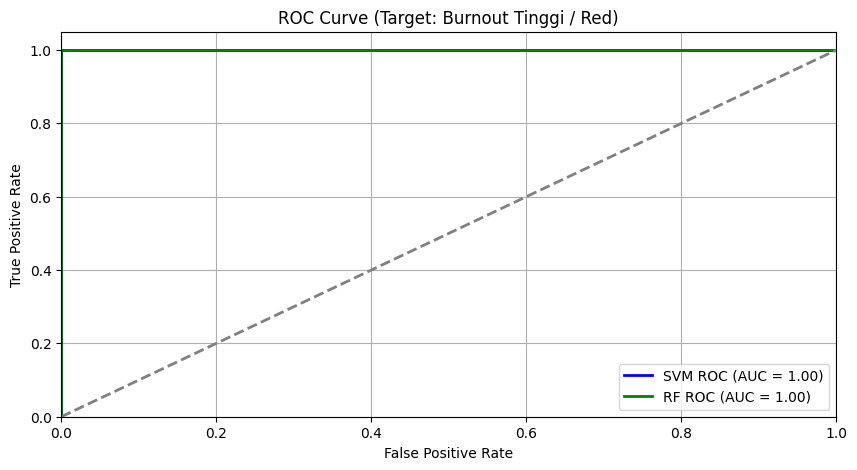

In [ ]:
# Ubah label y_test menjadi biner: 1 jika 'Red', 0 jika bukan
y_test_binary = (y_test == 'Red').astype(int)

# Ambil probabilitas prediksi untuk kelas 'Red'
y_prob_svm = svm_model.predict_proba(X_test_scaled)[:, list(svm_model.classes_).index('Red')]
y_prob_rf = rf_model.predict_proba(X_test)[:, list(rf_model.classes_).index('Red')]

# Hitung ROC Curve
fpr_svm, tpr_svm, _ = roc_curve(y_test_binary, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test_binary, y_prob_rf)

# Hitung AUC
roc_auc_svm = auc(fpr_svm, tpr_svm)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curve
plt.figure(figsize=(10, 5))
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2, label=f'SVM ROC (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'RF ROC (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Target: Burnout Tinggi / Red)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

ROC Curve di atas menunjukkan kemampuan dua model klasifikasi — Support Vector Machine (SVM) dan Random Forest (RF) — dalam membedakan individu dengan Burnout Tinggi (ditandai dengan label 'Red') dari individu lainnya.

Semakin besar nilai Area Under Curve (AUC), semakin baik performa model dalam membedakan kedua kelas tersebut. ROC membantu mengevaluasi trade-off antara tingkat kesalahan positif dan deteksi benar (sensitivity) pada berbagai ambang batas klasifikasi.

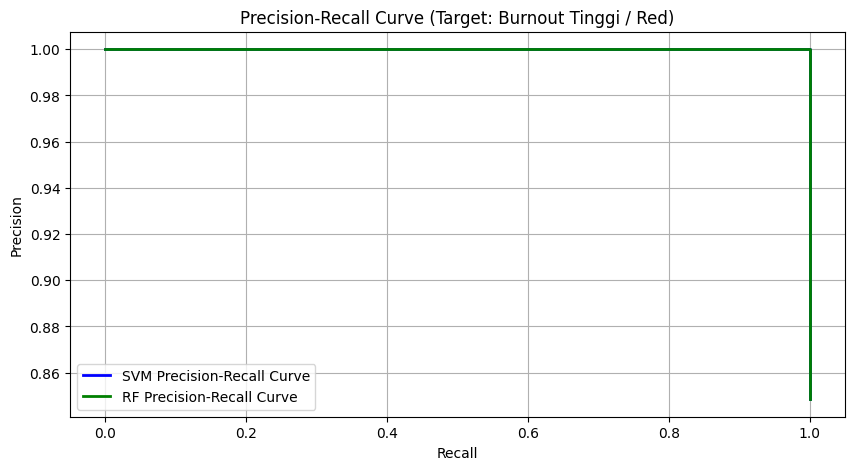

In [ ]:
# Konversi target ke biner (1 jika 'Red', 0 jika bukan)
y_test_binary = (y_test == 'Red').astype(int)

# Hitung precision-recall curve
precision_svm, recall_svm, _ = precision_recall_curve(y_test_binary, y_prob_svm)
precision_rf, recall_rf, _ = precision_recall_curve(y_test_binary, y_prob_rf)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(recall_svm, precision_svm, color='blue', lw=2, label='SVM Precision-Recall Curve')
plt.plot(recall_rf, precision_rf, color='green', lw=2, label='RF Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Target: Burnout Tinggi / Red)')
plt.legend(loc='lower left')
plt.grid()
plt.show()

Grafik di atas menunjukkan Precision-Recall Curve untuk model SVM dan Random Forest dengan target khusus pada kelas Burnout Tinggi (Red).
Grafik ini berguna ketika kita fokus pada performa terhadap kelas minoritas atau penting — dalam hal ini, individu dengan tingkat burnout tinggi.

Precision-Recall Curve sering kali lebih informatif daripada ROC jika data tidak seimbang (misalnya, jumlah mahasiswa burnout tinggi lebih sedikit).
Semakin tinggi area di bawah kurva, semakin baik model dalam mengidentifikasi kasus burnout tanpa banyak kesalahan positif.

Kesimpulan Akhir
SVM adalah model yang lebih baik dalam kasus ini, karena:

Memiliki akurasi, precision, recall, dan F1-score yang lebih tinggi.

Lebih mampu mengenali semua kelas, termasuk kelas yang minoritas.

Lebih stabil berdasarkan precision-recall curve.

Random Forest masih layak digunakan, tetapi perlu perbaikan (misal: handling class imbalance dengan SMOTE atau class weighting).